Epoch 1/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6958 - loss: 0.8411 - val_accuracy: 0.8534 - val_loss: 0.4002
Epoch 2/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8555 - loss: 0.4064 - val_accuracy: 0.8717 - val_loss: 0.3437
Epoch 3/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8770 - loss: 0.3417 - val_accuracy: 0.8878 - val_loss: 0.3029
Epoch 4/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8888 - loss: 0.3092 - val_accuracy: 0.8921 - val_loss: 0.2874
Epoch 5/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.8964 - loss: 0.2856 - val_accuracy: 0.9009 - val_loss: 0.2662
Epoch 6/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9056 - loss: 0.2605 - val_accuracy: 0.9072 - val_loss: 0.2497
Epoch 7/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9120 - loss: 0.2393 - val_accuracy: 0.9086 - val_loss: 0.2495
Epoch 8/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9173 - loss: 0.2242 - val_accu

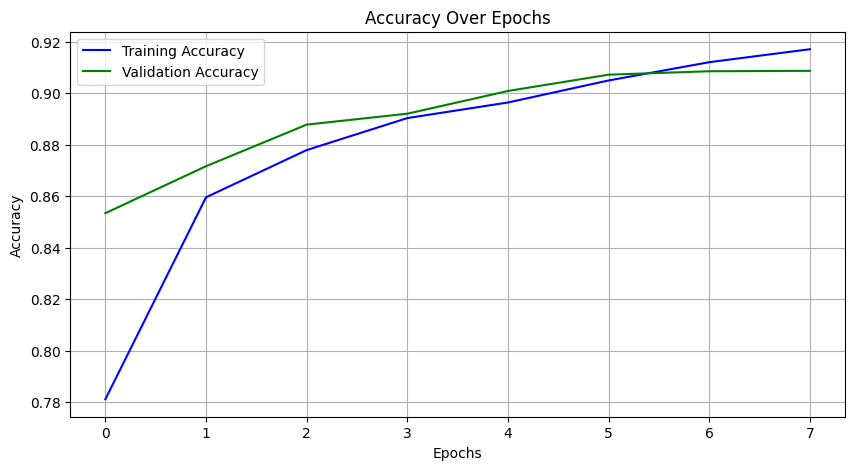

In [4]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


simple_cnn = Sequential()


simple_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
simple_cnn.add(MaxPooling2D(pool_size=(2, 2)))

simple_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
simple_cnn.add(MaxPooling2D(pool_size=(2, 2)))


simple_cnn.add(Flatten())


simple_cnn.add(Dense(128, activation='relu'))
simple_cnn.add(Dropout(0.4))


simple_cnn.add(Dense(10, activation='softmax'))


simple_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = simple_cnn.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=8,
    batch_size=64,
    verbose=1
)


test_loss, test_accuracy = simple_cnn.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


plt.figure(figsize=(10, 5))


plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

